In [1]:
import pandas
import ast
import datetime
import matplotlib.pyplot as plt
import re
import numpy as np

In [2]:
# read dataframe
d=pandas.read_csv("data/df2020-03-04.csv")
# Convert string representation of list to list
d['values']=d['values'].apply(lambda x : ast.literal_eval(x))


In [3]:
d.head()

,Unnamed: 0,n_table,name,structureWithDailyNumbers,structureWithPopulation,values,report
0,0,1,Table,True,True,[1],Situation report - 43Coronavirus disease 2019 ...
1,1,1,March,True,True,[2020],Situation report - 43Coronavirus disease 2019 ...
2,2,1,Hubei,True,True,"[5917, 114, 64, 31, 67217, 2834]",Situation report - 43Coronavirus disease 2019 ...
3,3,1,Guangdong,True,True,"[11346, 0, 0, 0, 1350, 7]",Situation report - 43Coronavirus disease 2019 ...
4,4,1,Henan,True,True,"[9605, 0, 0, 0, 1272, 22]",Situation report - 43Coronavirus disease 2019 ...


In [4]:
# get date from report string: find ')' character and then there is the date
# d['report'].unique()
d['date']=d['report'].apply(lambda x: datetime.datetime.strptime(x[x.index(')')+1:].strip(), '%d %B %Y'))
d=d.sort_values(by=['date'])
d.head()

,Unnamed: 0,n_table,name,structureWithDailyNumbers,structureWithPopulation,values,report,date
2622,16,1,https://www.who.int/ith/2020-,False,False,[901],Situation report - 1Novel Coronavirus (2019-nC...,2020-01-21
2606,0,1,Hubei Province,False,False,[258],Situation report - 1Novel Coronavirus (2019-nC...,2020-01-21
2607,1,1,Guangdong,False,False,[14],Situation report - 1Novel Coronavirus (2019-nC...,2020-01-21
2608,2,1,Beijing Municipality,False,False,[5],Situation report - 1Novel Coronavirus (2019-nC...,2020-01-21
2609,3,1,Shanghai Municipality,False,False,[1],Situation report - 1Novel Coronavirus (2019-nC...,2020-01-21


In [5]:
# the number of confirmed cases is in values list, the position depends on the structure of the report
# (NOTE: for china's places WHO changes structure so last reports are different from the first ones)


# there should be a row for each situation report and country
# the situation reports have different structures, WHO do not keep the same structure for all the reports
# but there are some wrong records that are not related to country so detect them in order to remove them
# so try to group by report and detect for each report the wrong records
d['n_values']=d['values'].apply(lambda x: len(x))
d.head()

,Unnamed: 0,n_table,name,structureWithDailyNumbers,structureWithPopulation,values,report,date,n_values
2622,16,1,https://www.who.int/ith/2020-,False,False,[901],Situation report - 1Novel Coronavirus (2019-nC...,2020-01-21,1
2606,0,1,Hubei Province,False,False,[258],Situation report - 1Novel Coronavirus (2019-nC...,2020-01-21,1
2607,1,1,Guangdong,False,False,[14],Situation report - 1Novel Coronavirus (2019-nC...,2020-01-21,1
2608,2,1,Beijing Municipality,False,False,[5],Situation report - 1Novel Coronavirus (2019-nC...,2020-01-21,1
2609,3,1,Shanghai Municipality,False,False,[1],Situation report - 1Novel Coronavirus (2019-nC...,2020-01-21,1


In [6]:
d[d['name']=='Hubei']

,Unnamed: 0,n_table,name,structureWithDailyNumbers,structureWithPopulation,values,report,date,n_values
2334,0,1,Hubei,False,False,[7153],Situation report - 12Novel Coronavirus (2019-n...,2020-02-01,1
2271,0,1,Hubei,False,False,[9074],Situation report - 13Novel Coronavirus (2019-n...,2020-02-02,1
2200,0,1,Hubei,False,False,[11177],Situation report - 14 - Erratum Novel Coronavi...,2020-02-03,1
2134,0,1,Hubei,False,False,[13522],Situation report - 15Novel Coronavirus (2019-n...,2020-02-04,1
2071,0,1,Hubei,False,False,[16678],Situation report - 16 - ErratumNovel Coronavir...,2020-02-05,1
2000,0,1,Hubei,False,False,"[22, 112]",Situation report - 18Novel Coronavirus (2019-n...,2020-02-07,2
1930,0,1,Hubei,False,False,"[24, 953]",Situation report - 19Novel Coronavirus (2019-n...,2020-02-08,2
1861,0,1,Hubei,False,False,"[27, 100]",Situation report - 20Novel Coronavirus (2019-n...,2020-02-09,2
1792,0,1,Hubei,False,False,[29631],Situation report - 21Novel Coronavirus (2019-n...,2020-02-10,1
1718,0,1,Hubei,False,False,[31728],Situation report - 22Novel Coronavirus (2019-n...,2020-02-11,1


In [7]:
# set index of number of cases in values list
d['idx_cases']=-1
d.loc[~d['structureWithDailyNumbers'] & d['structureWithPopulation'],'idx_cases']=1 # this is for china data, get second value
d.loc[d['structureWithDailyNumbers'] & d['structureWithPopulation'],'idx_cases']=-2 # this is for china data, get second to last value
d.loc[d['n_table']>1,'idx_cases']=0 # records not in the first table (table not with china data) has the value in first position
d.loc[d['n_values']==1,'idx_cases']=0 # there is only one value
# this is for china data, if there is no index set than this is the case for taking first one and multiply values by 1000
d.loc[d['idx_cases']==-1,'values']=d.loc[d['idx_cases']==-1,'values'].apply(lambda x: [el*1000 for el in x])
d.loc[d['idx_cases']==-1,'idx_cases']=0

d.head()

,Unnamed: 0,n_table,name,structureWithDailyNumbers,structureWithPopulation,values,report,date,n_values,idx_cases
2622,16,1,https://www.who.int/ith/2020-,False,False,[901],Situation report - 1Novel Coronavirus (2019-nC...,2020-01-21,1,0
2606,0,1,Hubei Province,False,False,[258],Situation report - 1Novel Coronavirus (2019-nC...,2020-01-21,1,0
2607,1,1,Guangdong,False,False,[14],Situation report - 1Novel Coronavirus (2019-nC...,2020-01-21,1,0
2608,2,1,Beijing Municipality,False,False,[5],Situation report - 1Novel Coronavirus (2019-nC...,2020-01-21,1,0
2609,3,1,Shanghai Municipality,False,False,[1],Situation report - 1Novel Coronavirus (2019-nC...,2020-01-21,1,0


In [8]:
# check length limits
# not greater than length
d.loc[d['idx_cases']>=d['n_values'],'idx_cases']=d.loc[d['idx_cases']>=d['n_values'],'n_values']-1
# not lower than length
d.loc[d['idx_cases']+d['n_values']<0,'idx_cases']=0 # china data that take the third to last but there is not enough values, so take the first one

In [9]:
d['cases']=[row['values'][min(row['idx_cases'],row['n_values']-1)] for index, row in d.iterrows()]


In [10]:
d['name']=d['name'].str.replace(' Municipality','') # remove Municipality substring in order to have the same name for all reports
d['name']=d['name'].str.replace('conveyance (Japan)','(Diamond Princess)') # use only (Diamond Princess) instead of other aliases
d['name']=d['name'].str.replace('^Republic of\)$','Iran (Islamic Republic of)') # there are some records missing the first part

In [11]:
# get countries with more cases
min_cases=800
cm=d.groupby(['name']).agg({'cases':['max']})
cm.columns = ['_'.join(col) for col in cm.columns]
cm=cm.reset_index()
cm=cm.sort_values(by=['cases_max'],ascending=False)
cm=cm[cm['cases_max']>min_cases] # consider at least min_cases
cm



,name,cases_max
177,Total,846000
178,Totals,68584
84,Hubei,67217
59,Figure 2: Epidemic curve by date of onset of 2...,26000
46,China*,24363
69,Grand total§,10566
158,Subtotal for all regions,9860
139,Republic of Korea,4812
68,Grand total,2459
100,Italy,2036


In [12]:
# remove rows with invalid names and rows with number of cases equals to 2019 and 2020, these are wrong records
cm=cm[~cm['name'].str.contains('otal|^((?![a-zA-Z]))|\d|https',regex=True)]
cm=cm[(cm['cases_max']!=2019) & (cm['cases_max']!=2020) & (cm['cases_max']!=2019000)]
cm=cm[~cm['name'].str.contains('January|,|/|nCoV|Unspecified',regex=True)]
countries=[c for c in cm['name'] if c not in 'ubei the remaining on regions Table']
countries

c:\users\a\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


['Hubei',
 'China*',
 'Republic of Korea',
 'Italy',
 'Iran (Islamic Republic of)',
 'Guangdong',
 'Henan',
 'Zhejiang',
 'Hunan',
 'Anhui',
 'Jiangxi']

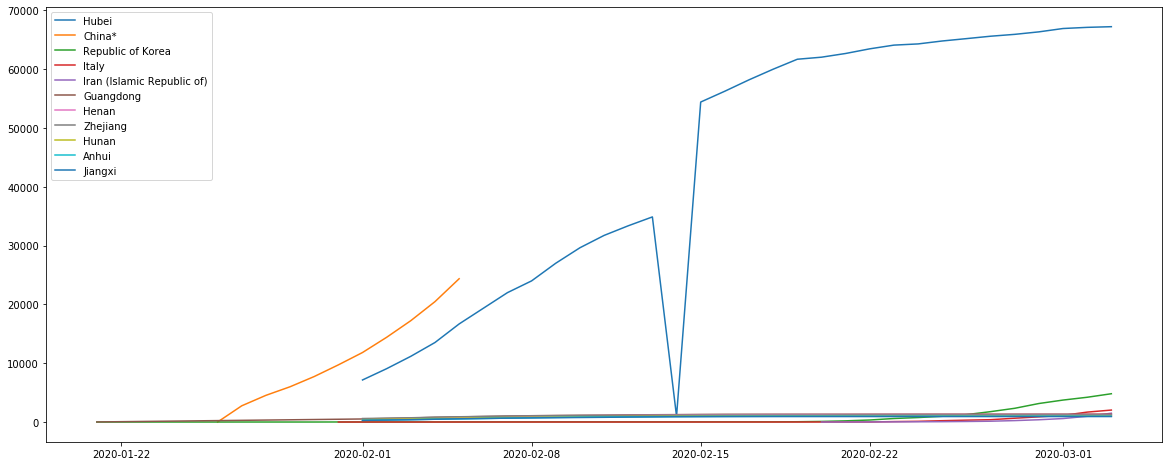

In [13]:
plt.figure(figsize=(20,8))
for country in countries:
    plt.plot( 'date', 'cases', data=d[d['name']==country], marker='', label=country)
plt.legend()
plt.savefig('epidemiologicalCurveByCountryWithHubei.png')

In [14]:
# check the rows about Hubei that have less than 10k cases, it is strange the value for the 14th February 2020
anomalies = d.loc[(d['name']=='Hubei') & (d['date']>=datetime.datetime(2020,2,13)) & (d['date']<=datetime.datetime(2020,2,16)),['name','values','idx_cases','cases']]
anomalies.style.set_properties(subset=['values'], **{'width-min': '300px'}) # increase width for value column in order to visualize all values
# the right value for 2020 02 14 is 51986 but in values there is 51 and 986 separated (this is caused by parsing problems)

,name,values,idx_cases,cases
1572,Hubei,"[5917, 34874]",1,34874
1502,Hubei,"[5917, 1728, 3095, 4823, 1154, 116, 36, 602, 15, 384, 51, 986, 1318]",-2,986
1431,Hubei,"[5917, 1282, 1138, 2420, 1216, 139, 37884, 16522, 54406, 1457]",-2,54406
1359,Hubei,"[5917, 955, 888, 1843, 1036, 139, 38839, 17410, 56249, 1596]",-2,56249


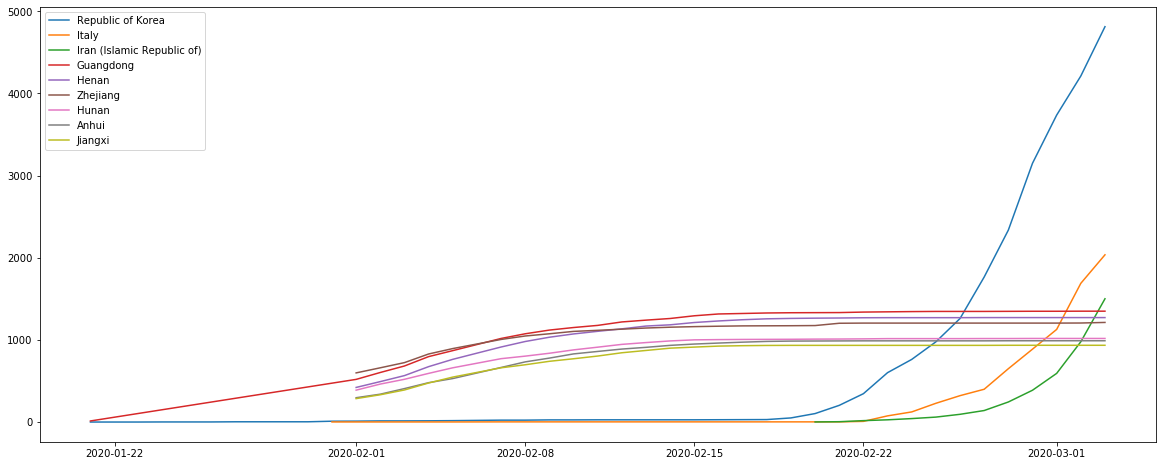

In [15]:
countries = [c for c in countries if c != 'Hubei' and 'China' not in c]
plt.figure(figsize=(20,8))
for country in countries:
    plt.plot( 'date', 'cases', data=d[d['name']==country], marker='', label=country)
plt.legend()
plt.savefig('epidemiologicalCurveByCountry.png')

In [16]:
# let's compare trend among differenc countries
# get date for each country in wich began 50 or more cases

In [17]:
dates=d[d['cases']>=50].groupby('name').agg({'date':['first']})
dates.columns = ['_'.join(col) for col in dates.columns]
dates=dates.reset_index()
dd=d.merge(dates, on='name', how='left')

dd['day']=(dd['date']-dd['date_first']).dt.days

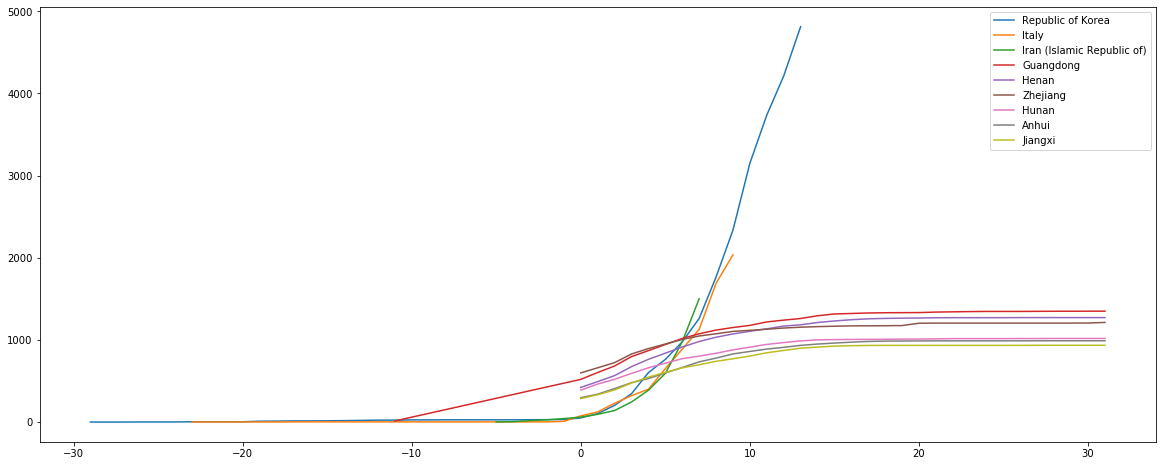

In [18]:
plt.figure(figsize=(20,8))
for country in countries:
    plt.plot( 'day', 'cases', data=dd[dd['name']==country], marker='', label=country)
plt.legend()
plt.savefig('epidemiologicalCurveByCountryRel.png')

In [19]:
countries = ['Italy','Republic of Korea','Iran']

esc_lst = [re.escape(s) for s in countries]
pattern = '|'.join(esc_lst)
dt = dd[(dd['name'].str.contains(pattern, case=False)) & (dd['day']>-6)]

a=dt.pivot_table(index=['day'],columns=['name'],values=['cases'],aggfunc=np.sum)
a.columns=a.columns.droplevel()
a.to_csv('casesByCountry.csv')
a

name,Iran (Islamic Republic of),Italy,Republic of Korea
day,,,
-5.0,2.0,3.0,28.0
-4.0,5.0,3.0,28.0
-3.0,18.0,3.0,29.0
-2.0,28.0,3.0,30.0
-1.0,43.0,9.0,31.0
0.0,61.0,76.0,51.0
1.0,95.0,124.0,104.0
2.0,141.0,229.0,204.0
3.0,245.0,322.0,346.0
